In [1]:
# ignore this cell (it's just to make certain text red later, but you don't need to understand it).
from IPython.core.display import display, HTML
display(HTML('<style>em { color: red; }</style> <style>.container { width:100% !important; }</style>'))

In [2]:
import pandas as pd
from pandas import DataFrame, Series
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams["font.size"] = 15

In [3]:
import random

# Stock Market Example

In [4]:
df = pd.read_csv("sp500.csv")
df.head()

,year,return
0,1970,1.0401
1,1971,1.1431
2,1972,1.1898
3,1973,0.8534
4,1974,0.7353


### How do we compute *total gain* for *every year*?

In [5]:
df["total"] = df["return"].cumprod()
df.tail()

,year,return,total
44,2014,1.1369,88.439335
45,2015,1.0138,89.659797
46,2016,1.1196,100.383109
47,2017,1.2183,122.296742
48,2018,0.9557,116.878996


### Assuming you initally invested *1000 dollars in 1970*, what is your *total wealth* in every future year?

In [6]:
starting = 1000
df["wealth"] = df["total"] * starting
df.tail()

,year,return,total,wealth
44,2014,1.1369,88.439335,88439.334579
45,2015,1.0138,89.659797,89659.797397
46,2016,1.1196,100.383109,100383.109165
47,2017,1.2183,122.296742,122296.741896
48,2018,0.9557,116.878996,116878.996230


### How do we create a *line plot* to plot *wealth gain* over the years?

Text(0, 0.5, 'Total wealth ($)')

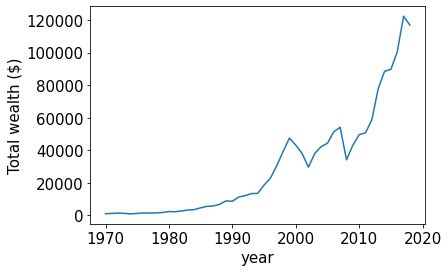

In [7]:
ax = df.set_index("year")["wealth"].plot.line()
ax.set_ylabel("Total wealth ($)")

### Random simulation

In [8]:
random.choice([3, 5, 9]) # sampling with replacement

5

In [9]:
random.choices([3, 5, 9], k = 10)

[3, 5, 3, 3, 5, 3, 5, 9, 3, 5]

### How risky is it in investing in SP500 index going forward?
### Approach:
1. Run simulation, randomly replaying past years.
2. Run hundreds of simulations, explore range of outcomes.

In [10]:
# Step 1
def run_sim(years = 10, starting = 1000):
    rand_returns = random.choices(df["return"], k = years)
    rand_returns = Series(rand_returns)
    rand_returns = rand_returns.cumprod() * starting
    return rand_returns

# Step 2
def run_n_sims(n, years = 10, starting = 1000):
    sims = pd.DataFrame()
    for i in range(n):
        sims["sim" + str(i)] = run_sim(years = 10, starting = 1000) 
    return sims

### For *10 years*, run *50 simulations*

In [11]:
sims = run_n_sims(50)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim40,sim41,sim42,sim43,sim44,sim45,sim46,sim47,sim48,sim49
5,1828.586598,2537.884914,1056.284185,2399.844492,2114.243491,2620.006262,3508.928371,1813.905294,1705.671006,1411.132587,...,1763.067443,2157.957723,2508.637554,1330.981643,2626.578425,1428.110007,2851.732370,1048.022860,1910.935803,3423.895755
6,2227.767053,2591.434286,1111.739105,2971.967419,2246.806558,1650.603945,4511.780099,2148.389431,1729.209266,1636.913801,...,2041.455792,2271.250504,2984.776961,1552.057693,3377.254539,1357.846994,2646.977986,1397.643286,2322.742469,3603.650282
7,2118.160914,2695.350800,1232.696320,4088.832775,2977.018689,2123.997157,5978.108632,2716.853274,2119.318877,1815.010022,...,2175.375292,2382.768904,2837.925935,1838.257132,3069.924376,1543.736248,2934.969191,1840.556443,2988.905009,4096.990005
8,2421.269741,3143.048568,1631.966657,4842.813538,3016.315336,1561.775109,7080.471863,2825.799090,2471.337742,2116.483187,...,2650.259719,2827.631858,2993.728069,1958.846800,3490.197023,1831.951805,2975.471766,2060.686993,2856.496517,3724.163915
9,2247.422573,3459.867864,2149.789678,4132.857074,3935.386619,1748.563412,6732.112648,3271.992766,2720.448586,2369.614576,...,2852.209509,2702.367767,3785.868516,1984.703578,4553.660056,2413.230113,3299.203094,1605.275168,3265.261169,4858.916660


## How do you become a successful Data Scientist?
- By learning how to play both the detective and the lawyer

### How do we create a *line plot* to visualize all of the simulations?
- Be the detective

<AxesSubplot:>

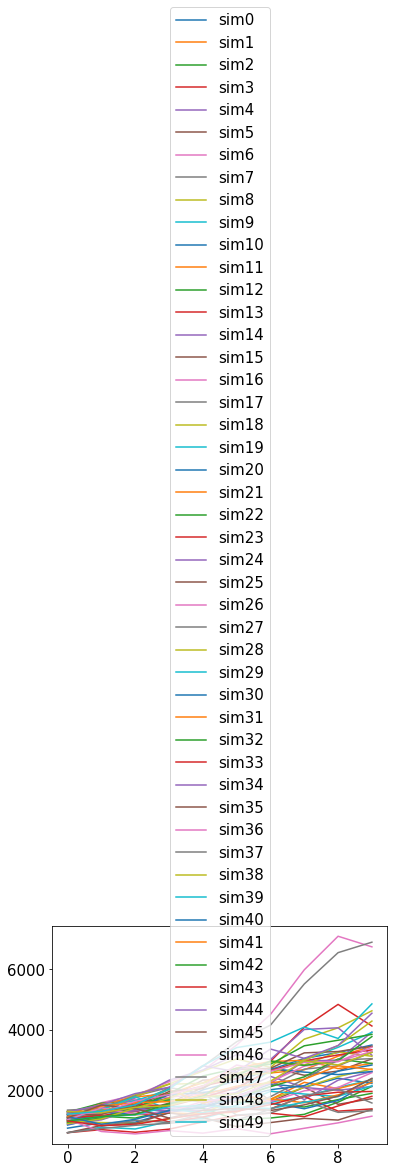

In [12]:
sims.plot.line()

<AxesSubplot:>

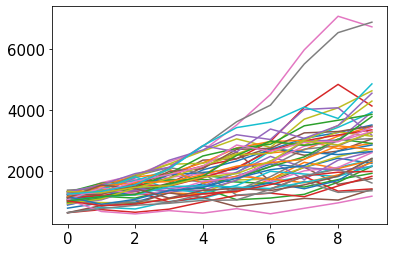

In [13]:
sims.plot.line(legend = False)

### How do we create a *line plot* to present *statistics* of all of the simulations?
- Be the lawyer

### For *10 years*, run *250 simulations*

In [14]:
sims = run_n_sims(250)
sims.tail()

,sim0,sim1,sim2,sim3,sim4,sim5,sim6,sim7,sim8,sim9,...,sim240,sim241,sim242,sim243,sim244,sim245,sim246,sim247,sim248,sim249
5,2002.744562,1276.553491,1616.117674,1934.291581,1772.162654,2672.408301,1520.932451,1980.488159,2438.122409,1919.899963,...,2004.926506,3024.336441,1665.156146,501.500589,3098.461413,1447.082236,2364.599034,1914.477461,1657.652380,1848.766905
6,2335.400434,1511.949954,1964.391033,2055.571663,1512.363609,3538.001350,2002.915944,2077.730127,3083.249598,2333.638405,...,2223.062510,3718.724088,1928.084302,552.051849,3809.868153,1234.939980,2990.271939,1991.248007,1919.395691,1970.046014
7,2220.498733,1594.956007,2562.940981,2741.310370,2003.881781,4104.081566,2101.259117,2671.545398,3747.689886,2461.755154,...,2464.931711,3867.844924,1789.647849,736.216345,4059.795504,1382.638802,3291.691350,2116.099257,2273.332256,2608.143919
8,2721.443247,1004.822284,3417.938093,3610.031626,1710.112712,5433.393585,2329.876109,3254.743758,4961.566641,2169.052466,...,3215.996403,4080.189610,2455.396848,746.376131,5585.466654,1603.861010,3189.648918,1648.441321,2202.858956,2771.674542
9,3583.868612,932.676044,4189.024926,3350.831355,2095.914140,5508.374416,1814.973489,3414.551677,5640.805114,2256.031470,...,3116.300515,4757.909105,2791.540677,865.796312,7663.260249,1413.161936,3860.751050,2008.296061,2916.364972,3151.116787


### Quantile function
- enables to calculate percentiles
- defaults to 50th percentile and computes column percentile

In [15]:
sims.quantile()

sim0      1989.698654
sim1      1159.542426
sim2      1741.454127
sim3      1756.266050
sim4      1504.308558
             ...     
sim245    1430.122086
sim246    2101.089941
sim247    1547.265249
sim248    1513.230190
sim249    1833.886257
Name: 0.5, Length: 250, dtype: float64

In [16]:
sims.quantile(0.5)

sim0      1989.698654
sim1      1159.542426
sim2      1741.454127
sim3      1756.266050
sim4      1504.308558
             ...     
sim245    1430.122086
sim246    2101.089941
sim247    1547.265249
sim248    1513.230190
sim249    1833.886257
Name: 0.5, Length: 250, dtype: float64

In [17]:
sims.quantile(0.7)

sim0      2254.969243
sim1      1264.389842
sim2      2143.956018
sim3      2261.293275
sim4      1728.727695
             ...     
sim245    1618.649093
sim246    3050.085032
sim247    1937.508624
sim248    2004.434671
sim249    2161.475386
Name: 0.7, Length: 250, dtype: float64

### How to change *quantile* to compute percentile of *rows*?
- Using axis parameter.
- axis parameter takes a value of 0 or 1.
- axis works for many functions like mean, std, etc.,
- Default value for axis is 0, so that is column computation
- If you want row-wise computation, you will have to set axis to be 1

<AxesSubplot:>

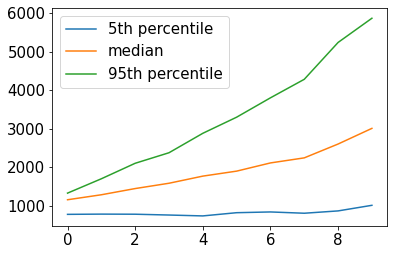

In [18]:
# .quantile
DataFrame({
    "5th percentile": sims.quantile(0.05, axis = 1),
    "median": sims.quantile(0.5, axis = 1),
    "95th percentile": sims.quantile(0.95, axis = 1)
}).plot.line()

# Bar Plot Example w/ Fire Hydrants

In [19]:
df = pd.read_csv("Fire_Hydrants.csv")
df.head()

,X,Y,OBJECTID,CreatedBy,CreatedDate,LastEditor,LastUpdate,FacilityID,DataSource,ProjectNumber,...,Elevation,Manufacturer,Style,year_manufactured,BarrelDiameter,SeatDiameter,Comments,nozzle_color,MaintainedBy,InstallType
0,-89.519573,43.049308,2536,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-2,FASB,NaN,...,1138.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
1,-89.521988,43.049193,2537,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-4,FASB,NaN,...,1170.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
2,-89.522093,43.048233,2538,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2361-19,FASB,NaN,...,1179.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
3,-89.521013,43.049033,2539,NaN,NaN,WUJAG,2018-06-07T19:45:53.000Z,HYDR-2360-3,FASB,NaN,...,1163.0,NaN,Pacer,1995.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN
4,-89.524782,43.056263,2540,NaN,NaN,WUPTB,2017-08-31T16:19:46.000Z,HYDR-2257-5,NaN,NaN,...,1065.0,NaN,Pacer,1996.0,5.0,NaN,NaN,blue,MADISON WATER UTILITY,NaN


In [20]:
df.columns

Index(['X', 'Y', 'OBJECTID', 'CreatedBy', 'CreatedDate', 'LastEditor',
       'LastUpdate', 'FacilityID', 'DataSource', 'ProjectNumber',
       'InstallDate', 'LifecycleStatus', 'Location', 'SymbolRotation',
       'HydrantType', 'Elevation', 'Manufacturer', 'Style',
       'year_manufactured', 'BarrelDiameter', 'SeatDiameter', 'Comments',
       'nozzle_color', 'MaintainedBy', 'InstallType'],
      dtype='object')

### Let's create a *bar plot* to visualize *colors* of fire hydrants.

Text(0, 0.5, 'Fire hydrant count')

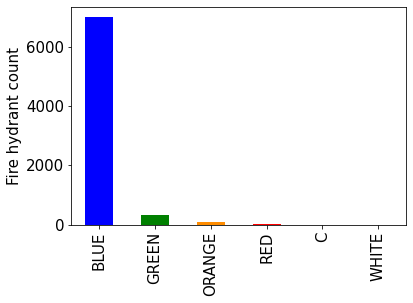

In [21]:
clean_df = df["nozzle_color"].str.upper()# How to handle clean up of the data?
ax = clean_df.value_counts().plot.bar(color=["b", "g", "darkorange", "r", "c", "0.5"]) 
# Not recommended to use same aspect of data for multiple plot aspects (x-axis and color)
ax.set_ylabel("Fire hydrant count")

### Let's create a *bar plot* to visualize *style* of fire hydrants.

<AxesSubplot:>

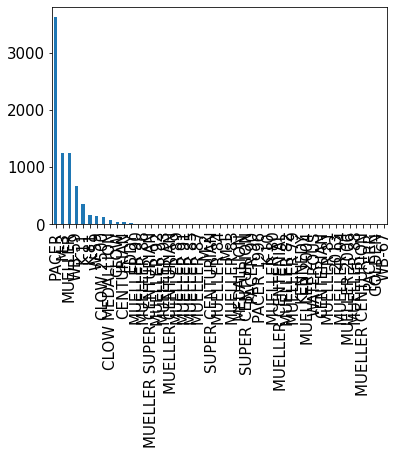

In [22]:
style_counts = df["Style"].str.upper().value_counts()
style_counts.plot.bar()

Text(0.5, 0, 'Hydrant count')

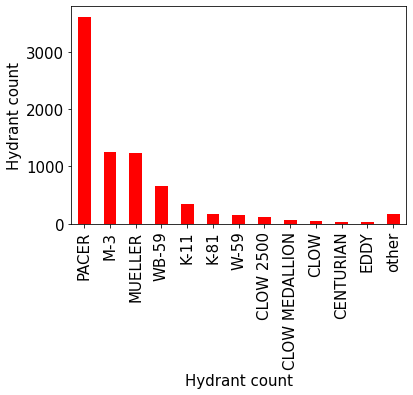

In [23]:
top12 = style_counts.iloc[:12]
top12["other"] = style_counts.iloc[12:].sum()
ax = top12.plot.bar(color="r")
ax.set_ylabel("Hydrant count")
ax.set_xlabel("Hydrant count")

### NEXT LECTURE: In what decade were pacers manufactured? .... The last lecture on plotting is coming!